In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analysis For Airbnb Data

In [155]:
dfCalendar = pd.read_csv('/Users/alex/Downloads/archive/calendar.csv')
dfListings = pd.read_csv('/Users/alex/Downloads/archive/listings.csv')
dfReviews = pd.read_csv('/Users/alex/Downloads/archive/reviews.csv')

## Part 1 Lets expore and see the info of our data

In [156]:
dfCalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [157]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [158]:
dfListings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

## Part 2 Lets investigate "prices" in fille listings.csv

### Question 1 | What is the avg price of this dataset?

In [159]:
#We will check if na values, we can see that we don't have na values
dfListings['price'].isna().sum()

0

In [160]:
prices = dfListings['price'].values

#### Let's see what column price contains

In [161]:
print("First 10 Price Values:")
print(prices[:10])

First 10 Price Values:
['$250.00' '$65.00' '$65.00' '$75.00' '$79.00' '$75.00' '$100.00' '$75.00'
 '$58.00' '$229.00']


In [162]:
#We can see that we need to clear price column.

## Part 2.1 Lets clear price column.

#### Our data contain the $ sign so we will remove it

In [163]:
# Remove dollar signs and convert 'price' column to numeric
dfListings['price'] = dfListings['price'].replace('[\$,]', '', regex=True)

#### Now we will convert string to float values

In [164]:
dfListings['price'] = dfListings['price'].astype(float)

In [165]:
prices = dfListings['price'].values

## Part 2.2 Lets get some statistics about prices

In [166]:
#This a method that display statistics about a list of numbers
def statistics(values):
    # Calculate statistics
    avg_price = np.mean(values)
    median_price = np.median(values)
    std_dev_price = np.std(values)
    min_price = np.min(values)
    max_price = np.max(values)

    # Print the calculated statistics
    print(f"Average Price: {avg_price:.2f}")
    print(f"Median Price : {median_price}")
    print(f"Standard Deviation: {std_dev_price:.2f}")
    print(f"Minimum Price: {min_price}")
    print(f"Maximum Price: {max_price}")

In [167]:
#Let's execute def statistics
statistics(prices)

Average Price: 173.93
Median Price : 150.0
Standard Deviation: 148.31
Minimum Price: 10.0
Maximum Price: 4000.0


## Part 2.2.1 Lets visualise prices

In [168]:
#This a method that visualise values
def histoGraph(values):
    plt.hist(values, bins=30, edgecolor='black')  # Adjust bins as per your data distribution
    plt.show() 

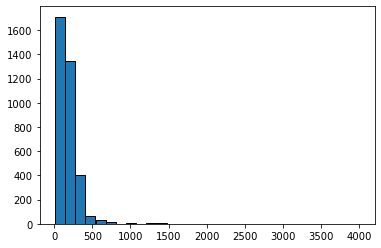

In [199]:
#Let's execute def histoGraph
histoGraph(prices)

### So the avg price is 173.93 $

## Part 3 Lets investigate "reviews_per_month" in fille listings.csv

### Question 2 | What is the avg review for a room?

In [200]:
#We will check if na values
dfListings['reviews_per_month'].isna().sum()

756

In [201]:
#And no na values
dfListings['reviews_per_month'].notna().sum()

2829

In [202]:
#Lets find how % are the na from our total data
print (
    ((dfListings['reviews_per_month'].isna().sum() * 100) / 
       (dfListings['reviews_per_month'].notna().sum() + dfListings['reviews_per_month'].isna().sum())), "%"
)

21.08786610878661 %


In [203]:
#So now we know that we don't include more that 21% of our data.

## Part 3.2 Lets get some statistics about reviews_per_month

In [188]:
# We will use the def statistics
reviews = dfListings['reviews_per_month'].notna().astype(float).values
statistics(reviews)

Average Price: 0.79
Median Price : 1.0
Standard Deviation: 0.41
Minimum Price: 0.0
Maximum Price: 1.0


## Part 3.2.1 Lets visualise reviews

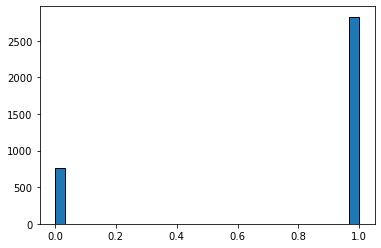

In [189]:
# We will use the def histoGraph
histoGraph(reviews)

### So the avg reviews_per_month is 0.79.

## Part 3.3 Lets manipulate na values

### We wiil investigate our finding if we replace na values with avg value

In [204]:
df_fulledReviews = dfListings['reviews_per_month'].fillna(0.79)

## Part 3.3.1 Lets get some statistics about reviews_per_month with na values manipulation

In [194]:
fulledReviews = df_fulledReviews.astype(float).values

In [197]:
statistics(fulledReviews)

Average Price: 1.72
Median Price : 0.79
Standard Deviation: 1.94
Minimum Price: 0.01
Maximum Price: 19.15


## Part 3.3.2 Lets visualise reviews_per_month with na values manipulation

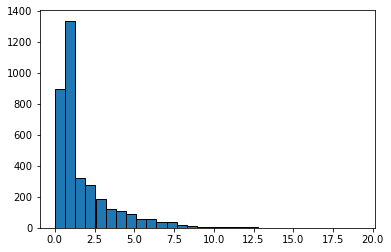

In [198]:
histoGraph(fulledReviews)

### So the avg reviews_per_month if we replace na values with avg value is 1.72.

## Part 4 Lets investigate category values as "cities" in city.csv

### Question 3 | Which city us the most popular?

## Part 4.1 Lets investigte the unique values

In [209]:
unique_cities = dfListings['city'].unique()

# Print all unique cities

print(unique_cities)

['Boston' 'Roslindale' 'Roslindale, Boston' 'Jamaica Plain' 'Brookline'
 'Jamaica Plain, Boston' 'Jamaica Plain (Boston)' 'Roxbury Crossing'
 'Jamaica Plain ' 'Jamaica Plain, MA' 'Boston (Jamaica Plain)'
 'Jamaica plain ' 'ROXBURY CROSSING' 'Mission Hill, Boston' 'boston' '波士顿'
 'Boston, Massachusetts, US' 'South End, Boston' 'Cambridge' 'East Boston'
 'east Boston ' 'Charlestown' 'Boston (Charlestown)' 'Somerville'
 'Watertown' 'Brighton' 'Brighton ' 'Boston ' nan 'West Roxbury' 'Newton'
 'Hyde Park' 'Mattapan' 'Milton' 'Dorchester' 'dorchester, boston '
 'South Boston' 'Allston' 'ALLSTON']


In [210]:
#We will check if na values (we can see them but lets make it sure)
dfListings['city'].isna().sum()

2

In [ ]:
# With only 2 na values we can continue our analysis

In [35]:
#And no na values
dfListings['city'].notna().sum()

3583

In [36]:
#Lets find how % are the na from our total data
print (
    ((dfListings['city'].isna().sum() * 100) / 
       (dfListings['city'].notna().sum() + dfListings['city'].isna().sum())), "%"
)

0.05578800557880056 %


In [37]:
#So now we know that we don't include more that 0.05% of our data, so we can continue

In [38]:
cities = dfListings['city'].dropna().tolist()

/var/folders/v5/w_f4h47d4rq122t8jytl0_xh0000gn/T/ipykernel_23491/257555768.py:12: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  plt.tight_layout()
/var/folders/v5/w_f4h47d4rq122t8jytl0_xh0000gn/T/ipykernel_23491/257555768.py:12: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  plt.tight_layout()
/var/folders/v5/w_f4h47d4rq122t8jytl0_xh0000gn/T/ipykernel_23491/257555768.py:12: UserWarning: Glyph 39039 (\N{CJK UNIFIED IDEOGRAPH-987F}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/sit

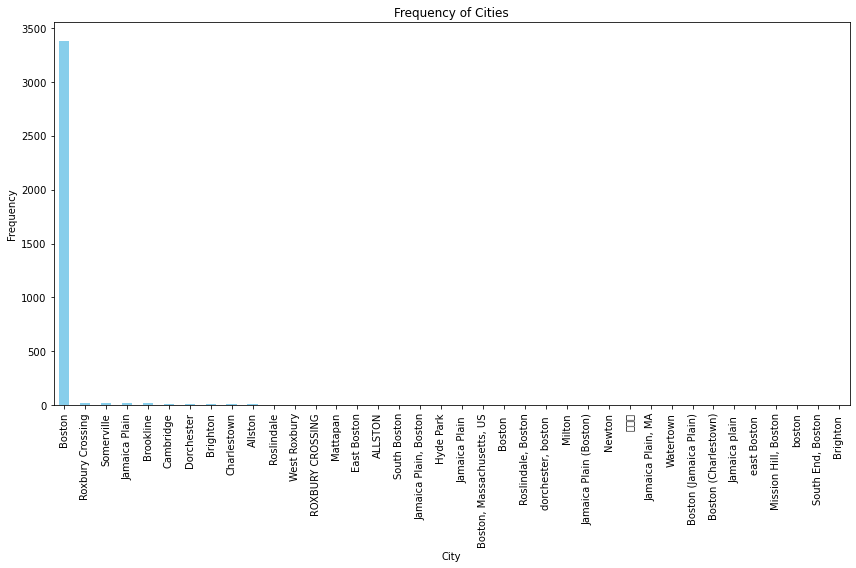

In [39]:
# Count the frequency of each city
city_counts = pd.Series(cities).value_counts()

# Plot the data

plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 
plt.tight_layout()  

In [41]:
# Show the plot
plt.show()

In [42]:
#We can see that we have issues with chinese characters but we can skip it for now.
#It is necessery to handle duplicate values as:

#'Jamaica Plain, Boston' 'Jamaica Plain (Boston)' 'Roxbury Crossing'
#'Jamaica Plain ' 'Jamaica Plain, MA' 'Boston (Jamaica Plain)'
#'Jamaica plain ' 'ROXBURY CROSSING'